# "Human behavioral complexity peaks at age 25"

#### MSDS 6331 Machine Learning 
##### Instructor: Dr. Dimitri Yatsenko
##### Author: Kristina Borovkova

# Project 
Review this study from cognitive psychology: 
* Gauvrit et al, (2017) ["Human behavioral complexity peaks at age 25"](https://doi.org/10.1371/journal.pcbi.1005408)
* [Dataset](https://github.com/algorithmicnaturelab/HumanBehavioralComplexity)

1. Reproduce the main finding in the paper that the ability to generate random sequencies peaks at age 25.
2. Design a binary classifier that uses the performance on these cognitive tasks to tell whether the person is in age category 1: 15-65 yo or category 2: all other ages.
3. Plot the ROC for the classifier.

Due date: Sep 22. 


In [1]:
ls

Assignment_1.ipynb  LICENSE             README.md           lifespan.csv


In [2]:
# Load the data
path="lifespan.csv"


In [3]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
import sklearn.linear_model


## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition


# Common imports
import numpy as np
import pandas as pd
import os

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [4]:
df=pd.read_csv(path, sep=' ')

In [5]:
#Top 5 Data Rows
df.head()

# K randomness 
# random item generation (RIG)
# approximate sense of complexity (ASC)

,sex,age,field,language,education,paranormal,toss.K,toss.RT,grid.K,grid.RT,...,roll.RT,spot.K,spot.RT,K,toss,guess,roll,spot,grid,RT
0,female,41.005479,humanities,french,4,0.0,-0.693077,45.1,-0.265943,12.7,...,11.8,-15.152845,7.7,-2.893729,111111,4352432155,2565145663,5555555555,101100101,99.8
1,male,42.298630,science,french,7,0.0,1.060495,9.1,0.356185,13.8,...,11.2,1.990685,13.3,1.289559,11010001011,3254123125,2415331652,5627496315,10001110,65.0
2,male,53.701370,science,french,6,0.0,0.201294,6.2,1.773449,20.6,...,11.7,1.516013,13.8,1.137125,11101000,4213512454,1112352436,9652981457,11101,65.8
3,male,53.789041,other,english,4,4.0,0.238520,16.3,0.068745,54.7,...,16.0,-15.152845,9.2,-3.308523,1111011101,1513325551,4455663366,4444444444,10101010,128.7
4,female,49.608219,science,french,6,0.0,-0.797830,9.8,0.723053,21.4,...,9.8,1.999894,13.1,1.086079,110110000000,2314532221,1256432156,1576284539,110111,67.1


In [6]:
# Data Description 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3449 entries, 0 to 3448
Data columns (total 23 columns):
sex           3437 non-null object
age           3429 non-null float64
field         3449 non-null object
language      3449 non-null object
education     3449 non-null int64
paranormal    3406 non-null float64
toss.K        3449 non-null float64
toss.RT       3449 non-null float64
grid.K        3449 non-null float64
grid.RT       3449 non-null float64
guess.K       3449 non-null float64
guess.RT      3449 non-null float64
roll.K        3449 non-null float64
roll.RT       3449 non-null float64
spot.K        3449 non-null float64
spot.RT       3449 non-null float64
K             3449 non-null float64
toss          3449 non-null int64
guess         3449 non-null int64
roll          3449 non-null int64
spot          3449 non-null int64
grid          3449 non-null int64
RT            3449 non-null float64
dtypes: float64(14), int64(6), object(3)
memory usage: 619.8+ KB


In [7]:
#Summary of Numerical ATtributes 
df.describe()

,age,education,paranormal,toss.K,toss.RT,grid.K,grid.RT,guess.K,guess.RT,roll.K,roll.RT,spot.K,spot.RT,K,toss,guess,roll,spot,grid,RT
count,3429.000000,3449.000000,3406.000000,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000,3.449000e+03,3.449000e+03,3.449000e+03,3.449000e+03,3.449000e+03,3449.000000
mean,37.719473,5.099739,0.948033,-0.211561,17.424297,-0.046597,17.186663,0.037420,20.654914,0.843083,15.524152,0.177425,13.034155,0.159954,2.958330e+10,3.363802e+09,3.841655e+09,5.795644e+09,4.766299e+07,83.824181
std,13.384786,1.571912,1.507670,1.357126,12.540295,1.429612,12.330998,2.948954,10.629972,1.671493,11.577707,3.859521,7.658923,1.383013,4.458157e+10,1.162949e+09,1.670032e+09,1.948870e+09,4.921520e+07,41.221141
min,4.002740,0.000000,0.000000,-4.415495,2.500000,-3.040966,0.000000,-9.982032,3.100000,-11.376923,-54.900000,-15.152845,4.500000,-8.793652,0.000000e+00,1.111111e+09,1.111111e+09,1.111111e+09,0.000000e+00,-11.000000
25%,28.263014,4.000000,0.000000,-0.720399,10.100000,-0.678035,9.600000,0.241428,14.100000,0.628920,9.000000,0.621925,9.100000,0.034860,1.001110e+09,2.425136e+09,2.416544e+09,5.186453e+09,1.110010e+06,58.500000
50%,35.931507,6.000000,0.000000,0.014702,14.300000,0.189438,14.300000,1.013431,18.400000,1.133788,12.700000,1.302889,11.500000,0.539068,1.000110e+10,3.413524e+09,4.225415e+09,5.555556e+09,1.110000e+07,75.500000
75%,45.923288,6.000000,1.000000,0.665394,21.300000,1.036960,21.400000,1.519393,24.200000,1.573376,18.500000,1.708608,14.700000,0.919942,1.111100e+10,4.253143e+09,5.321265e+09,6.842564e+09,1.010110e+08,98.600000
max,91.742466,7.000000,5.000000,4.803904,180.000000,1.821417,288.000000,2.413928,130.000000,2.552403,227.000000,2.244683,150.000000,1.858927,1.111110e+11,5.555556e+09,6.666667e+09,1.000000e+10,1.111111e+08,595.800000


In [8]:
df['age'].min()

4.0027397260274

In [9]:
df['age'].max()

91.7424657534247

### Description of the 5 random item generation (RIG) tasks used in the experiment.

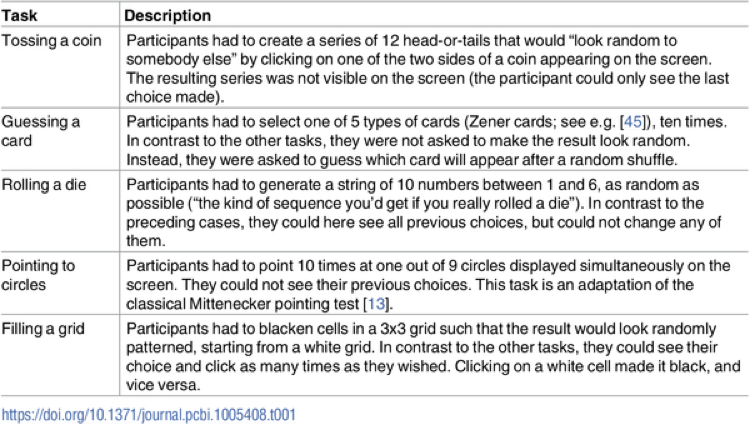

### Sample descriptive statistics (n)

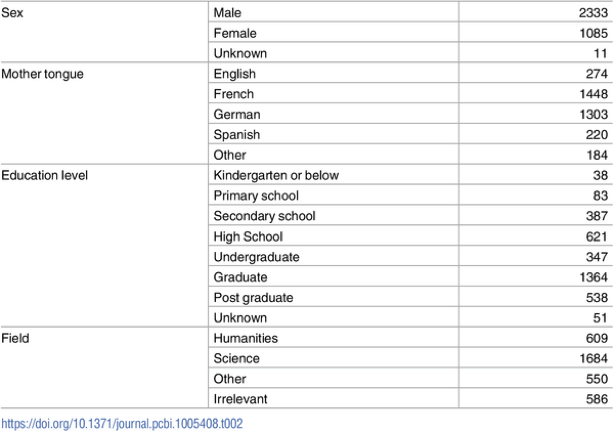

# 1. Reproduce the main finding in the paper that the ability to generate random sequencies peaks at age 25.

### Question: <font color=red> How to add trend curves and 95% confidence regions (shaded) to panda visualisation? </font>

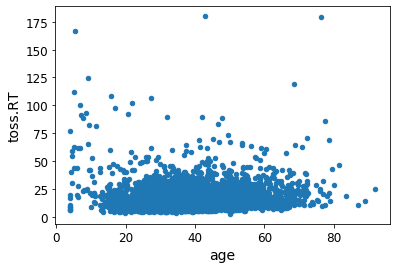

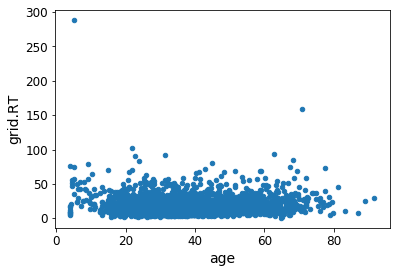

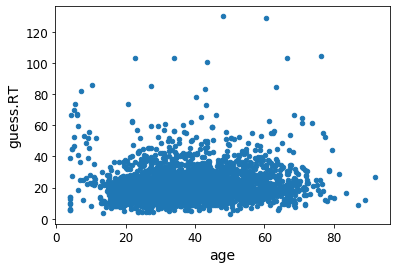

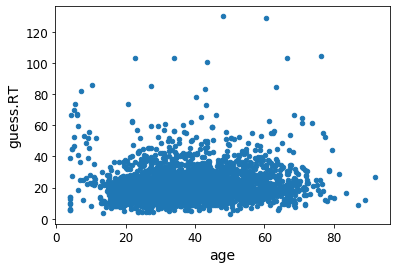

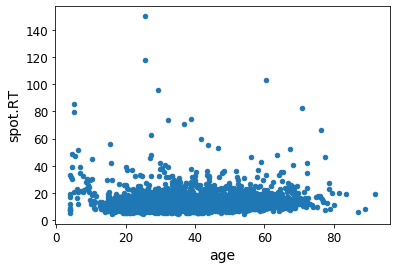

In [36]:
#panda
df.plot(kind='scatter', x= 'age', y='toss.RT')
df.plot(kind='scatter', x= 'age', y='grid.RT')
df.plot(kind='scatter', x= 'age', y='guess.RT')
df.plot(kind='scatter', x= 'age', y='guess.RT')
df.plot(kind='scatter', x= 'age', y='spot.RT')
plt.show()

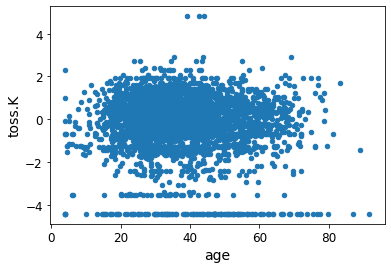

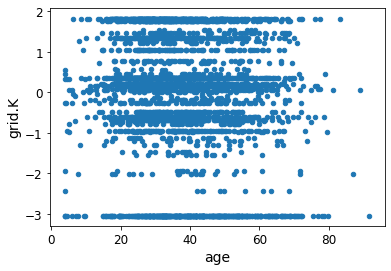

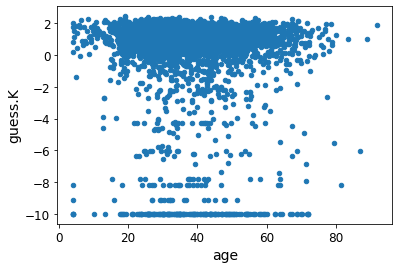

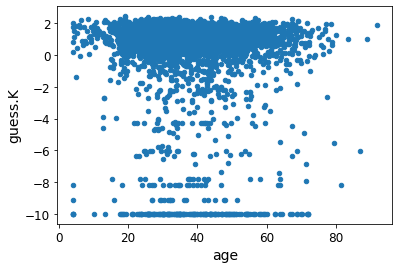

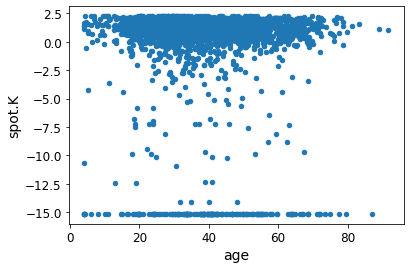

In [11]:
#panda
df.plot(kind='scatter', x= 'age', y='toss.K')
df.plot(kind='scatter', x= 'age', y='grid.K')
df.plot(kind='scatter', x= 'age', y='guess.K')
df.plot(kind='scatter', x= 'age', y='guess.K')
df.plot(kind='scatter', x= 'age', y='spot.K')
plt.show()

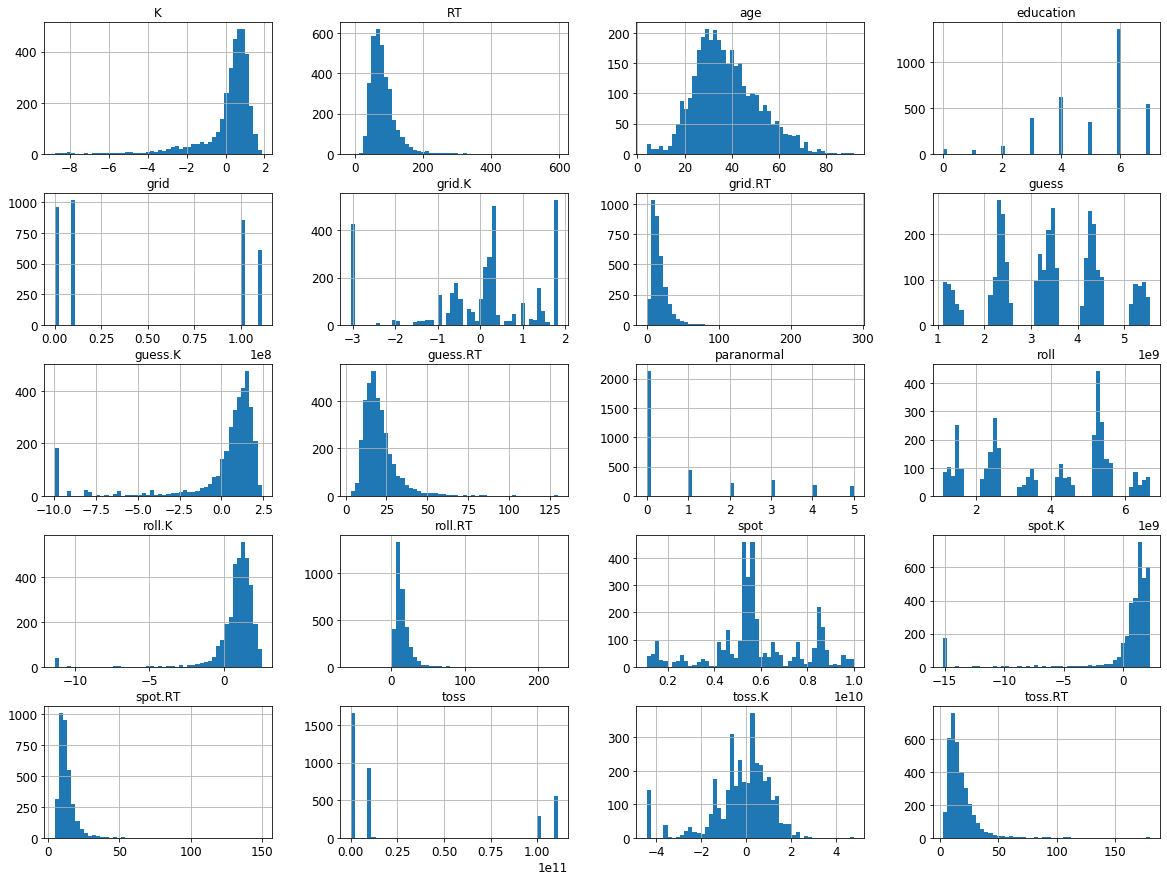

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

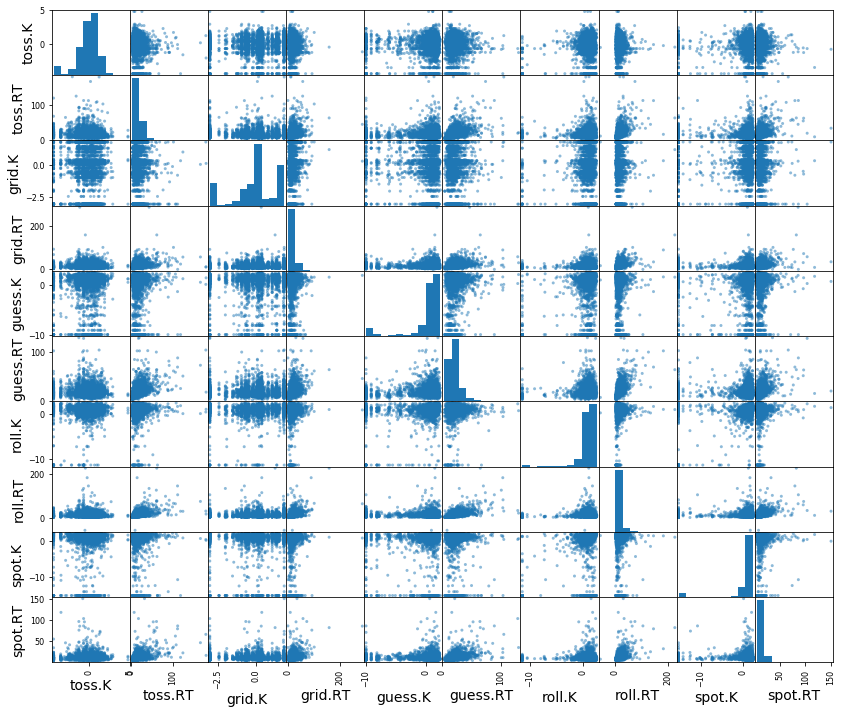

In [13]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["toss.K","toss.RT", "grid.K","grid.RT","guess.K","guess.RT","roll.K","roll.RT","spot.K","spot.RT"]
scatter_matrix(df[attributes], figsize=(14, 12))
plt.show()

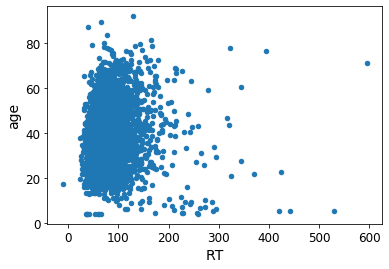

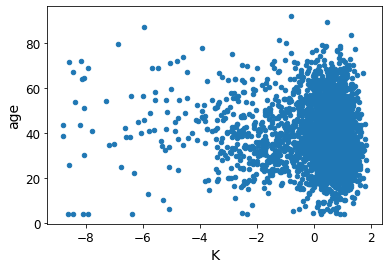

In [14]:
# Plot 
df.plot(kind='scatter', x= 'RT', y='age')
df.plot(kind='scatter', x= 'K', y='age')
plt.show()

In [15]:
age_color=df['age']

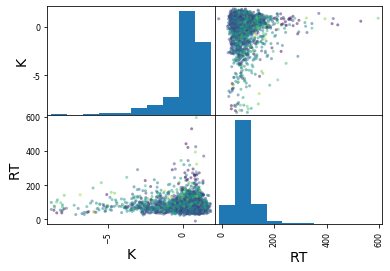

In [16]:
#Panda Scatterplot and developmental change trend of the CT and complexity combined.
attributes = ["K","RT"]
scatter_matrix(df[attributes], figsize=(6,4),c=age_color)
plt.show()

In [17]:
np.corrcoef(df['K'],df['RT'])

array([[ 1.       , -0.0090466],
       [-0.0090466,  1.       ]])

### Question:   <font color=red>How to replicate  visualisation (A) Total completion time (CT) and (B) mean complexity as a function of age, with trend curve and 95% confidence region (shaded area).</font>

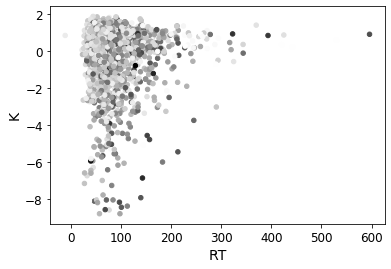

In [18]:
x = "age"
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(x, fontsize=20)

df.plot(kind='scatter', x= 'RT', y='K', c=age_color)
df.plot(kind='scatter', x= 'RT', y='K', c=age_color)
plt.show()

# 2. Design a binary classifier that uses the performance on these cognitive tasks to tell whether the person is in age category 
### 1: 15-65 yo 
# or
### 2: all other ages

In [19]:
df.head()

,sex,age,field,language,education,paranormal,toss.K,toss.RT,grid.K,grid.RT,...,roll.RT,spot.K,spot.RT,K,toss,guess,roll,spot,grid,RT
0,female,41.005479,humanities,french,4,0.0,-0.693077,45.1,-0.265943,12.7,...,11.8,-15.152845,7.7,-2.893729,111111,4352432155,2565145663,5555555555,101100101,99.8
1,male,42.298630,science,french,7,0.0,1.060495,9.1,0.356185,13.8,...,11.2,1.990685,13.3,1.289559,11010001011,3254123125,2415331652,5627496315,10001110,65.0
2,male,53.701370,science,french,6,0.0,0.201294,6.2,1.773449,20.6,...,11.7,1.516013,13.8,1.137125,11101000,4213512454,1112352436,9652981457,11101,65.8
3,male,53.789041,other,english,4,4.0,0.238520,16.3,0.068745,54.7,...,16.0,-15.152845,9.2,-3.308523,1111011101,1513325551,4455663366,4444444444,10101010,128.7
4,female,49.608219,science,french,6,0.0,-0.797830,9.8,0.723053,21.4,...,9.8,1.999894,13.1,1.086079,110110000000,2314532221,1256432156,1576284539,110111,67.1


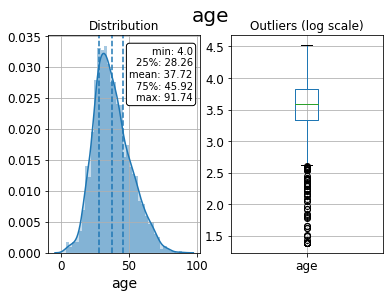

In [20]:
x = "age"
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(x, fontsize=20)

### distribution
ax[0].title.set_text('Distribution')
variable = df[x].fillna(df[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < 
                    breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = df[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)

des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))

### boxplot 
ax[1].title.set_text('Outliers (log scale)')
tmp_df = pd.DataFrame(df[x])
tmp_df[x] = np.log(tmp_df[x])
tmp_df.boxplot(column=x, ax=ax[1])
plt.show()


inspired by Mauro Di Pietro
[Full article on TowardsDataScience](https://towardsdatascience.com/machine-learning-with-python-classification-complete-tutorial-d2c99dc524ec)

In [21]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")


In [22]:
#Remove the text attribute because median can only be calculated on numerical attributes:
df_num= df.drop("sex", axis=1)
df_num= df_num.drop("field", axis=1)
df_num= df_num.drop("language", axis=1)

In [23]:
df_num.head()

,age,education,paranormal,toss.K,toss.RT,grid.K,grid.RT,guess.K,guess.RT,roll.K,roll.RT,spot.K,spot.RT,K,toss,guess,roll,spot,grid,RT
0,41.005479,4,0.0,-0.693077,45.1,-0.265943,12.7,0.753916,22.5,0.889305,11.8,-15.152845,7.7,-2.893729,111111,4352432155,2565145663,5555555555,101100101,99.8
1,42.298630,7,0.0,1.060495,9.1,0.356185,13.8,1.173177,17.6,1.867252,11.2,1.990685,13.3,1.289559,11010001011,3254123125,2415331652,5627496315,10001110,65.0
2,53.701370,6,0.0,0.201294,6.2,1.773449,20.6,1.867897,13.5,0.326973,11.7,1.516013,13.8,1.137125,11101000,4213512454,1112352436,9652981457,11101,65.8
3,53.789041,4,4.0,0.238520,16.3,0.068745,54.7,-0.076286,32.5,-1.620747,16.0,-15.152845,9.2,-3.308523,1111011101,1513325551,4455663366,4444444444,10101010,128.7
4,49.608219,6,0.0,-0.797830,9.8,0.723053,21.4,1.149639,13.0,2.355640,9.8,1.999894,13.1,1.086079,110110000000,2314532221,1256432156,1576284539,110111,67.1


In [24]:
imputer.fit(df_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [25]:
imputer.statistics_

array([3.59315068e+01, 6.00000000e+00, 0.00000000e+00, 1.47020213e-02,
       1.43000000e+01, 1.89437849e-01, 1.43000000e+01, 1.01343130e+00,
       1.84000000e+01, 1.13378831e+00, 1.27000000e+01, 1.30288921e+00,
       1.15000000e+01, 5.39067846e-01, 1.00011001e+10, 3.41352425e+09,
       4.22541512e+09, 5.55555556e+09, 1.11000010e+07, 7.55000000e+01])

In [26]:
#Check that this is the same as manually computing the median of each attribute:
df_num.median().values

array([3.59315068e+01, 6.00000000e+00, 0.00000000e+00, 1.47020213e-02,
       1.43000000e+01, 1.89437849e-01, 1.43000000e+01, 1.01343130e+00,
       1.84000000e+01, 1.13378831e+00, 1.27000000e+01, 1.30288921e+00,
       1.15000000e+01, 5.39067846e-01, 1.00011001e+10, 3.41352425e+09,
       4.22541512e+09, 5.55555556e+09, 1.11000010e+07, 7.55000000e+01])

In [27]:
#Transform the training set:
X = imputer.transform(df_num)

In [31]:
df_tr = pd.DataFrame(X, columns=df_num.columns,
                          index=df.index)

In [32]:
imputer.strategy

'median'

In [33]:
df_tr.head()

,age,education,paranormal,toss.K,toss.RT,grid.K,grid.RT,guess.K,guess.RT,roll.K,roll.RT,spot.K,spot.RT,K,toss,guess,roll,spot,grid,RT
0,41.005479,4.0,0.0,-0.693077,45.1,-0.265943,12.7,0.753916,22.5,0.889305,11.8,-15.152845,7.7,-2.893729,1.111110e+05,4.352432e+09,2.565146e+09,5.555556e+09,101100101.0,99.8
1,42.298630,7.0,0.0,1.060495,9.1,0.356185,13.8,1.173177,17.6,1.867252,11.2,1.990685,13.3,1.289559,1.101000e+10,3.254123e+09,2.415332e+09,5.627496e+09,10001110.0,65.0
2,53.701370,6.0,0.0,0.201294,6.2,1.773449,20.6,1.867897,13.5,0.326973,11.7,1.516013,13.8,1.137125,1.110100e+07,4.213512e+09,1.112352e+09,9.652981e+09,11101.0,65.8
3,53.789041,4.0,4.0,0.238520,16.3,0.068745,54.7,-0.076286,32.5,-1.620747,16.0,-15.152845,9.2,-3.308523,1.111011e+09,1.513326e+09,4.455663e+09,4.444444e+09,10101010.0,128.7
4,49.608219,6.0,0.0,-0.797830,9.8,0.723053,21.4,1.149639,13.0,2.355640,9.8,1.999894,13.1,1.086079,1.101100e+11,2.314532e+09,1.256432e+09,1.576285e+09,110111.0,67.1


Now let's preprocess the categorical input feature


In [38]:
df_cat = df[["sex"]]
df_cat.head(2)

,sex
0,female
1,male


## Note:  <font color=red> Work in progress </font> Sept 12, 2020